In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pycbc.waveform import get_td_waveform,get_fd_waveform, fd_approximants
import pylab
import pycbc


In [17]:
mt = 100
q =1
l = 0
spin1 = [0.3,-0.3,0.9]
spin2 = [-0.3,0.3,-0.9]

hpa, hca = get_td_waveform(approximant="IMRPhenomXPHM",
                         mass1=mt / (1 + q), 
                         mass2=mt * q / (1 + q), 
                         delta_t=1.0/4096, 
                         f_lower=30.0, 
                         inclination=l,
                         spin1x = spin1[0],spin1y = spin1[1],spin1z = spin1[2],
                         spin2x = spin2[0],spin2y = spin2[1],spin2z = spin2[2],
                         mode_array=[[2,2]])



In [16]:

shifted_hpa, shifted_hca = get_td_waveform(approximant="IMRPhenomXPHM",
                         mass1=mt / (1 + q), 
                         mass2=mt * q / (1 + q), 
                         delta_t=1.0/4096, 
                         f_lower=30.0, 
                         inclination=l,
                         coa_phase = -np.pi/4,
                         delta_f = 0.01,
                         spin1x = spin1[0],spin1y = spin1[1],spin1z = spin1[2],
                         spin2x = spin2[0],spin2y = spin2[1],spin2z = spin2[2],
                         mode_array=[[2,2]])
    


In [18]:
detector = pycbc.detector.Detector("H1")  
ra = 30.0  
dec = -30.0  
psi = 0.7853
ra_rad = np.deg2rad(ra)
dec_rad = np.deg2rad(dec)


F_plus, F_cross = detector.antenna_pattern(ra_rad, dec_rad, psi,t_gps = 1126259462)

In [19]:
h = F_plus*hpa + F_cross*hca


shifted_h = F_plus*shifted_hpa + F_cross*shifted_hca

ht = h.to_frequencyseries()

function = np.sqrt(1.0)*np.exp( -1j*np.pi/2)
ht *= function
h2t = ht.to_timeseries(delta_t = ht.delta_t)



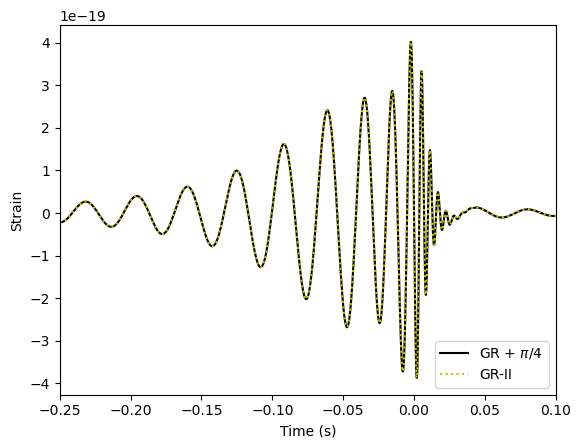

In [20]:

#pylab.plot(h.sample_times, h,'-r', label=" GR -a")
pylab.plot(shifted_h.sample_times, shifted_h,'k', label=r'GR + $ \pi /4$')
pylab.plot(h2t.sample_times, h2t,':y', label='GR-II')
#pylab.plot(hpm.sample_times, hpm,'-y', label='GR-m')
#pylab.plot(hpn.sample_times, hpn,'-g', label='GR-n')
pylab.xlim(-.25, .1)
pylab.ylabel('Strain')
pylab.xlabel('Time (s)')
pylab.legend(loc = "lower right")
plt.show()


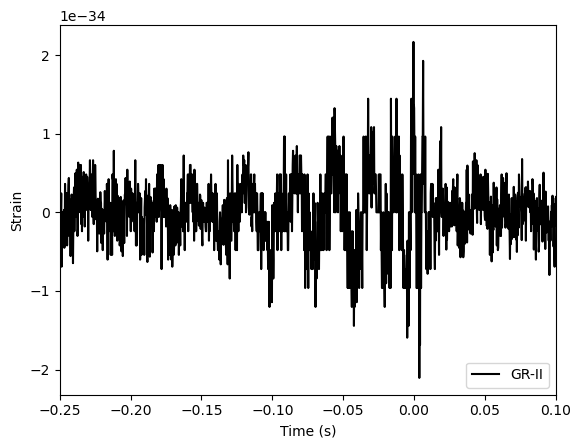

In [21]:
h_residual = h2t-shifted_h


pylab.plot(h_residual.sample_times, h_residual,'-k', label='GR-II')
pylab.xlim(-.25, .1)
pylab.ylabel('Strain')
pylab.xlabel('Time (s)')
pylab.legend(loc = "lower right")
plt.show()



In [8]:

#hpm, hcm = get_td_waveform(approximant="IMRPhenomXPHM",
#                         mass1=mt / (1 + q), 
#                         mass2=mt * q / (1 + q), 
#                         delta_t=1.0/4096, 
#                         inclination=l,
#                         spin1x = spin1[0],spin1y = spin1[1],spin1z = spin1[2],
#                         spin2x = spin2[0],spin2y = spin2[1],spin2z = spin2[2],
#                          f_lower=30.0)
#
#hpn, hcn = get_td_waveform(approximant="IMRPhenomXPHM",
#                         mass1=mt / (1 + q), 
#                         mass2=mt * q / (1 + q), 
#                         delta_t=1.0/4096, 
#                         f_lower=30.0, 
#                         inclination=l,
#                         spin1x = 0,spin1y = 0,spin1z = 0,
#                         spin2x = 0,spin2y = 0,spin2z = 0)

In [9]:

#pylab.subplot(4,1,1)
#pylab.plot(hpa.sample_times, hpa,'-r', label='GR-a')
##pylab.plot(hpm.sample_times, hpm,'-y', label='GR-m')
##pylab.plot(hpn.sample_times, hpn,'-g', label='GR-n')
#pylab.xlim(-.25, .1)
#pylab.ylabel('Strain')
#pylab.xlabel('Time (s)')
#pylab.legend(loc = "lower right")
#
#
#pylab.subplot(4,1,3)
##pylab.plot(hpa.sample_times, hpa,'-r', label='GR-a')
#pylab.plot(hpm.sample_times, hpm,'-y', label='GR-m')
##pylab.plot(hpn.sample_times, hpn,'-g', label='GR-n')
#pylab.xlim(-.25, .1)
#pylab.ylabel('Strain')
#pylab.xlabel('Time (s)')
#pylab.legend(loc = "lower right")
#
#pylab.subplot(4,1,2)
##pylab.plot(hpa.sample_times, hpa,'-r', label='GR-a')
##pylab.plot(hpm.sample_times, hpm,'-y', label='GR-m')
#pylab.plot(hpn.sample_times, hpn,'-g', label='GR-n')
#pylab.xlim(-.25, .1)
#pylab.ylabel('Strain')
#pylab.xlabel('Time (s)')
#pylab.legend(loc = "lower right")
#
#pylab.subplot(4,1,4)
#pylab.plot(hpa.sample_times, hpa,'-r', label='GR-a')
#pylab.plot(hpm.sample_times, hpm,'-y', label='GR-m')
#pylab.plot(hpn.sample_times, hpn,'-g', label='GR-n')
#pylab.xlim(-.25, .1)
#pylab.ylabel('Strain')
#pylab.xlabel('Time (s)')
#pylab.legend(loc = "lower right")
#
#pylab.tight_layout()
#pylab.show()